#  The Capstone Project of Data Analytics Module

# Car Price Prediction EDA

## Introduction
Welcome to "***Car Price Prediction EDA Project***". This is the capstone project of ***Data Analytics*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy.

The project consists of 3 parts:
* First part is related with 'data cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, Dropping useless columns.
* Second part is related with 'filling data'. It deals with Missing Values. Categorical to numeric transformation is done.
* Third part is related with 'handling outliers of data' via Visualisation libraries. Some insights are extracted.

# PART- 1 (Data Cleaning)

In [240]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

import warnings
warnings.filterwarnings('ignore')
warnings.warn('this will not show')

%matplotlib inline
# %matplotlib notebook (Sunum için)

plt.rcParams['figure.figsize'] = (10,6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style('whitegrid')
pd.set_option('display.float_format', lambda x : '%3f' % x)  # Sayısal değerler noktadan sonra  3 haneli gelsin

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100   # Görmek istenilen rows ve columns sayısı

In [241]:
df = pd.read_json('scout_car.json', lines = True)

In [242]:
df.head(3).T

,0,1,2
url,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...
make_model,Audi A1,Audi A1,Audi A1
short_description,Sportback 1.4 TDI S-tronic Xenon Navi Klima,1.8 TFSI sport,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
vat,VAT deductible,Price negotiable,VAT deductible
km,"56,013 km","80,000 km","83,450 km"
registration,01/2016,03/2017,02/2016
prev_owner,2 previous owners,None,1 previous owner
kW,NaN,NaN,NaN


In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kW                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  Type                           15917 non-null  object 
 12  Previous Owners                9279 non-null  

In [244]:
df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'kW', 'hp', 'Type',
       'Previous Owners', 'Next Inspection', 'Inspection new', 'Warranty',
       'Full Service', 'Non-smoking Vehicle', 'null', 'Make', 'Model',
       'Offer Number', 'First Registration', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Body', 'Nr. of Doors',
       'Nr. of Seats', 'Model Code', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission', 'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'description', 'Emission Label', 'Gears', 'Country version',
       'Electricity consumption', 'Last Service Date', 'Other Fuel Types',
       'Availability', 'Last Timing Belt Service Date', 'Available from'],
      dtype='object')

In [245]:
df['Comfort_Convenience'] =df['\nComfort & Convenience\n']
df['Entertaintment_Media'] = df['\nEntertainment & Media\n']
df['Extras'] = df['\nExtras\n']
df['Safety_Security'] = df['\nSafety & Security\n']

In [246]:
drop_columns = ['\nComfort & Convenience\n', '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n']
drop_columns

['\nComfort & Convenience\n',
 '\nEntertainment & Media\n',
 '\nExtras\n',
 '\nSafety & Security\n']

In [247]:
df.drop(drop_columns, axis = 1, inplace = True)

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kW                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  Type                           15917 non-null  object 
 12  Previous Owners                9279 non-null  

In [249]:
df.shape

(15919, 54)

In [250]:
df.isnull().sum() * 100 / df.shape[0]    # for percent

url                               0.000000
make_model                        0.000000
short_description                 0.288963
body_type                         0.376908
price                             0.000000
vat                              28.349771
km                                0.000000
registration                      0.000000
prev_owner                       42.892141
kW                              100.000000
hp                                0.000000
Type                              0.012564
Previous Owners                  41.711163
Next Inspection                  77.793831
Inspection new                   75.299956
Warranty                         34.047365
Full Service                     48.395000
Non-smoking Vehicle              54.915510
null                              0.000000
Make                              0.000000
Model                             0.000000
Offer Number                     19.944720
First Registration               10.032037
Body Color 

In [251]:
def show_nans(df, limit) :
    missing = df.isnull().sum() * 100 / df.shape[0]
    return missing.loc[lambda x : x >= limit]

def pers_nans(serial) :
    #display percentage of nans in a Series
    return serial.isnull().sum() / serial.shape[0] * 100

In [252]:
show_nans(df, 90)

kW                              100.000000
Electricity consumption          99.139393
Last Service Date                96.444500
Other Fuel Types                 94.472015
Availability                     96.011056
Last Timing Belt Service Date    99.899491
Available from                   98.291350
dtype: float64

In [253]:
df_columns = show_nans(df, 90)
df_columns

kW                              100.000000
Electricity consumption          99.139393
Last Service Date                96.444500
Other Fuel Types                 94.472015
Availability                     96.011056
Last Timing Belt Service Date    99.899491
Available from                   98.291350
dtype: float64

In [254]:
df_columns = show_nans(df, 90).index
df_columns

Index(['kW', 'Electricity consumption', 'Last Service Date',
       'Other Fuel Types', 'Availability', 'Last Timing Belt Service Date',
       'Available from'],
      dtype='object')

In [255]:
df.drop(df_columns, axis = 1, inplace = True)

In [256]:
df.drop('null', axis  = 1,inplace = True)

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   url                   15919 non-null  object
 1   make_model            15919 non-null  object
 2   short_description     15873 non-null  object
 3   body_type             15859 non-null  object
 4   price                 15919 non-null  int64 
 5   vat                   11406 non-null  object
 6   km                    15919 non-null  object
 7   registration          15919 non-null  object
 8   prev_owner            9091 non-null   object
 9   hp                    15919 non-null  object
 10  Type                  15917 non-null  object
 11  Previous Owners       9279 non-null   object
 12  Next Inspection       3535 non-null   object
 13  Inspection new        3932 non-null   object
 14  Warranty              10499 non-null  object
 15  Full Service          8215 non-null 

# Let's examine and clean all the columns/features one by one: 

# url

In [258]:
df.url.value_counts(dropna = False)

https://www.autoscout24.com//offers/audi-a3-1-6tdi-limousine-navi-6-gang-xenon-led-euro6-diesel-silver-0e62c184-0522-45a7-aa5c-5969b3a98868            1
https://www.autoscout24.com//offers/opel-insignia-st-innovation-shz-pdc-navi-panorama-led-licht-gasoline-black-f83c8a5d-59c8-4c34-a06e-2f7b303fb41d    1
https://www.autoscout24.com//offers/renault-espace-1-6dci-tt-energy-zen-edc-118kw-diesel-grey-c0ef7f7a-de61-da21-e053-e350040ab894                     1
https://www.autoscout24.com//offers/audi-a1-sportback-design-1-4-tdi-s-tronic-navi-xenon-diesel-black-b9d1a6ca-df2f-4d8a-b304-8939fb4952d0             1
https://www.autoscout24.com//offers/opel-astra-k-st-1-4-at-innovation-navi-agr-shz-8-tkm-gasoline-grey-fda31842-f75c-43a0-9949-61bc3de71fa9            1
                                                                                                                                                      ..
https://www.autoscout24.com//offers/audi-a3-spb-1-6-tdi-s-tronic-sport-diesel-blue

In [259]:
df.drop('url', axis = 1, inplace = True)

# make_model

In [260]:
df.make_model.value_counts(dropna = False)

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

In [261]:
df.columns

Index(['make_model', 'short_description', 'body_type', 'price', 'vat', 'km',
       'registration', 'prev_owner', 'hp', 'Type', 'Previous Owners',
       'Next Inspection', 'Inspection new', 'Warranty', 'Full Service',
       'Non-smoking Vehicle', 'Make', 'Model', 'Offer Number',
       'First Registration', 'Body Color', 'Paint Type', 'Body Color Original',
       'Upholstery', 'Body', 'Nr. of Doors', 'Nr. of Seats', 'Model Code',
       'Gearing Type', 'Displacement', 'Cylinders', 'Weight', 'Drive chain',
       'Fuel', 'Consumption', 'CO2 Emission', 'Emission Class', 'description',
       'Emission Label', 'Gears', 'Country version', 'Comfort_Convenience',
       'Entertaintment_Media', 'Extras', 'Safety_Security'],
      dtype='object')

# Make

In [262]:
df.Make.value_counts(dropna = False)

\nOpel\n       7343
\nAudi\n       5712
\nRenault\n    2864
Name: Make, dtype: int64

In [263]:
df.Make = df.Make.str.strip('\n') 

In [264]:
df.Make.value_counts(dropna = False)

Opel       7343
Audi       5712
Renault    2864
Name: Make, dtype: int64

In [265]:
df.drop('Make', axis = 1, inplace = True)

# Model

In [266]:
df.Model.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, A3, \n]          3097
[\n, A1, \n]          2614
[\n, Insignia, \n]    2598
[\n, Astra, \n]       2526
[\n, Corsa, \n]       2219
[\n, Clio, \n]        1839
[\n, Espace, \n]       991
[\n, Duster, \n]        34
[\n, A2, \n]             1
Name: Model, dtype: int64

In [267]:
df.Model = df. Model.str[1]

In [268]:
df.Model.value_counts(dropna = False)

A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
A2             1
Name: Model, dtype: int64

In [269]:
df.drop('Model', axis = 1, inplace = True)

# short_description

In [270]:
df.short_description.value_counts(dropna = False)

SPB 1.6 TDI 116 CV S tronic Sport                  64
NaN                                                46
1.4 66kW (90CV) Selective                          40
MOVE KLIMA CD USB ALLWETTER BLUETOOTH              38
SPB 30 TDI S tronic Business                       35
                                                   ..
1.4 75PS 5-Türer Klima Radio BlueTooth 6xAirbag     1
1.6 Turbo Dynamic LED Kamera Einparkass             1
1.4 Turbo Innovation Sitzhzg./Klima/MF-Lenkrad      1
1.6 TDI S tronic Sportba Eu 6 Xen 18 Zoll           1
Advanced                                            1
Name: short_description, Length: 10002, dtype: int64

In [271]:
df.drop('short_description', axis = 1, inplace = True)

In [272]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'registration',
       'prev_owner', 'hp', 'Type', 'Previous Owners', 'Next Inspection',
       'Inspection new', 'Warranty', 'Full Service', 'Non-smoking Vehicle',
       'Offer Number', 'First Registration', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Body', 'Nr. of Doors',
       'Nr. of Seats', 'Model Code', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission', 'Emission Class', 'description', 'Emission Label',
       'Gears', 'Country version', 'Comfort_Convenience',
       'Entertaintment_Media', 'Extras', 'Safety_Security'],
      dtype='object')

# description

In [273]:
df.description.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [274]:
df.drop('description', axis = 1, inplace = True)

In [275]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'registration',
       'prev_owner', 'hp', 'Type', 'Previous Owners', 'Next Inspection',
       'Inspection new', 'Warranty', 'Full Service', 'Non-smoking Vehicle',
       'Offer Number', 'First Registration', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Body', 'Nr. of Doors',
       'Nr. of Seats', 'Model Code', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission', 'Emission Class', 'Emission Label', 'Gears',
       'Country version', 'Comfort_Convenience', 'Entertaintment_Media',
       'Extras', 'Safety_Security'],
      dtype='object')

# body_type

In [276]:
df.body_type.value_counts(dropna = False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [277]:
df['Body_Type'] = df.body_type

In [278]:
df.Body_Type.value_counts(dropna = False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: Body_Type, dtype: int64

In [279]:
df.drop('body_type', axis = 1, inplace = True)

# Body

In [280]:
df.Body.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Sedans, \n]           7903
[\n, Station wagon, \n]    3553
[\n, Compact, \n]          3153
[\n, Van, \n]               783
[\n, Other, \n]             290
[\n, Transporter, \n]        88
NaN                          60
[\n, Off-Road, \n]           56
[\n, Coupe, \n]              25
[\n, Convertible, \n]         8
Name: Body, dtype: int64

In [281]:
df.drop('Body', axis = 1, inplace = True)

# price (target column)

In [282]:
df.price.value_counts(dropna = False)

14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
31940      1
15540      1
21649      1
27790      1
34815      1
Name: price, Length: 2956, dtype: int64

In [283]:
df['Price'] = df.price

In [284]:
df.drop('price', axis = 1, inplace = True)

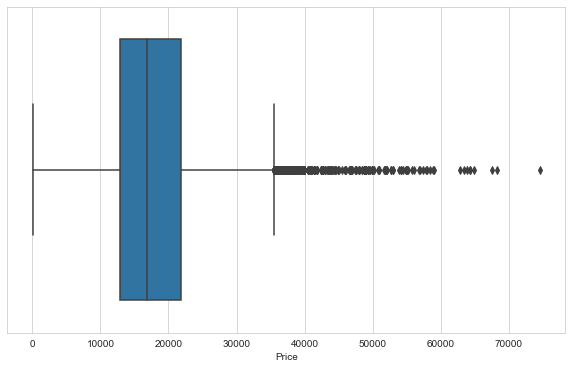

In [285]:
sns.boxplot(df.Price);

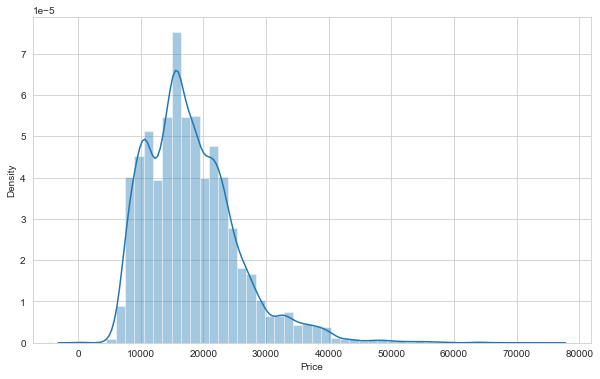

In [286]:
sns.distplot(df.Price);

In [287]:
df.columns

Index(['make_model', 'vat', 'km', 'registration', 'prev_owner', 'hp', 'Type',
       'Previous Owners', 'Next Inspection', 'Inspection new', 'Warranty',
       'Full Service', 'Non-smoking Vehicle', 'Offer Number',
       'First Registration', 'Body Color', 'Paint Type', 'Body Color Original',
       'Upholstery', 'Nr. of Doors', 'Nr. of Seats', 'Model Code',
       'Gearing Type', 'Displacement', 'Cylinders', 'Weight', 'Drive chain',
       'Fuel', 'Consumption', 'CO2 Emission', 'Emission Class',
       'Emission Label', 'Gears', 'Country version', 'Comfort_Convenience',
       'Entertaintment_Media', 'Extras', 'Safety_Security', 'Body_Type',
       'Price'],
      dtype='object')

# vat

The Value Added Tax or VAT in the European Union is a general, broadly based consumption tax assessed on the value  added to goods and services.

In [288]:
df.vat.value_counts(dropna = False)

VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64

In [289]:
df['Vat'] = df.vat

In [290]:
df.drop('vat', axis = 1, inplace = True)

In [291]:
df.columns

Index(['make_model', 'km', 'registration', 'prev_owner', 'hp', 'Type',
       'Previous Owners', 'Next Inspection', 'Inspection new', 'Warranty',
       'Full Service', 'Non-smoking Vehicle', 'Offer Number',
       'First Registration', 'Body Color', 'Paint Type', 'Body Color Original',
       'Upholstery', 'Nr. of Doors', 'Nr. of Seats', 'Model Code',
       'Gearing Type', 'Displacement', 'Cylinders', 'Weight', 'Drive chain',
       'Fuel', 'Consumption', 'CO2 Emission', 'Emission Class',
       'Emission Label', 'Gears', 'Country version', 'Comfort_Convenience',
       'Entertaintment_Media', 'Extras', 'Safety_Security', 'Body_Type',
       'Price', 'Vat'],
      dtype='object')

# km

In [292]:
df.km.value_counts(dropna = False)

10 km         1045
- km          1024
1 km           367
5 km           170
50 km          148
              ... 
25,438 km        1
136,100 km       1
4,833 km         1
6,749 km         1
103,374 km       1
Name: km, Length: 6690, dtype: int64

In [293]:
df.km.str.replace(',','').str.extract('(\d{1,8})')[0].astype('float')

0       56013.000000
1       80000.000000
2       83450.000000
3       73000.000000
4       16200.000000
            ...     
15914            NaN
15915    9900.000000
15916      15.000000
15917      10.000000
15918            NaN
Name: 0, Length: 15919, dtype: float64

In [294]:
df.km = df.km.str.replace(',','').str.extract('(\d{1,8})')[0].astype('float')
# If there is no decimal in column, extract returns NaN but the split method can't.
# Function of extract returns a dataframe, that's why we have to use slicing method before changing the type of column.
# [0] returned series.

In [295]:
df.km.value_counts(dropna = False)

10.000000        1045
NaN              1024
1.000000          367
5.000000          170
50.000000         148
                 ... 
160542.000000       1
20719.000000        1
91910.000000        1
39860.000000        1
57889.000000        1
Name: km, Length: 6690, dtype: int64

In [296]:
df.columns

Index(['make_model', 'km', 'registration', 'prev_owner', 'hp', 'Type',
       'Previous Owners', 'Next Inspection', 'Inspection new', 'Warranty',
       'Full Service', 'Non-smoking Vehicle', 'Offer Number',
       'First Registration', 'Body Color', 'Paint Type', 'Body Color Original',
       'Upholstery', 'Nr. of Doors', 'Nr. of Seats', 'Model Code',
       'Gearing Type', 'Displacement', 'Cylinders', 'Weight', 'Drive chain',
       'Fuel', 'Consumption', 'CO2 Emission', 'Emission Class',
       'Emission Label', 'Gears', 'Country version', 'Comfort_Convenience',
       'Entertaintment_Media', 'Extras', 'Safety_Security', 'Body_Type',
       'Price', 'Vat'],
      dtype='object')

# registration

In [297]:
df.registration.value_counts(dropna = False)

-/-        1597
03/2018     695
02/2019     585
05/2018     572
03/2019     543
04/2018     541
01/2019     541
02/2018     539
03/2016     536
04/2016     532
06/2018     532
01/2018     511
04/2019     506
02/2016     472
03/2017     471
05/2016     459
06/2016     452
05/2019     440
06/2017     409
05/2017     404
07/2018     396
04/2017     380
01/2016     376
02/2017     368
01/2017     306
08/2018     285
06/2019     224
07/2017     215
11/2017     180
07/2016     176
10/2016     160
10/2017     154
09/2017     149
11/2016     142
09/2016     141
09/2018     141
12/2016     134
12/2017     123
08/2017     114
11/2018     110
12/2018     103
10/2018      97
08/2016      94
07/2019       6
09/2019       5
11/2019       1
08/2019       1
12/2019       1
Name: registration, dtype: int64

In [298]:
df.registration.str.extract('(\d{4,7})')

,0
0,2016
1,2017
2,2016
3,2016
4,2016
...,...
15914,NaN
15915,2019
15916,2019
15917,2019


In [299]:
df.drop('registration', axis = 1, inplace = True)

# First Registration

We prefer 'First Registration' column because we don't need month values  

In [300]:
df['First Registration'].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, 2018, \n]    4522
[\n, 2016, \n]    3674
[\n, 2017, \n]    3273
[\n, 2019, \n]    2853
NaN               1597
Name: First Registration, dtype: int64

In [301]:
df['First Registration'] = df['First Registration'].str[1].astype('float')

In [302]:
df['Age'] = 2019 - df['First Registration']

In [303]:
df['Age'].value_counts(dropna = False)

1.000000    4522
3.000000    3674
2.000000    3273
0.000000    2853
NaN         1597
Name: Age, dtype: int64

In [304]:
df.drop('First Registration', axis = 1, inplace = True)

In [305]:
df.columns

Index(['make_model', 'km', 'prev_owner', 'hp', 'Type', 'Previous Owners',
       'Next Inspection', 'Inspection new', 'Warranty', 'Full Service',
       'Non-smoking Vehicle', 'Offer Number', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Nr. of Doors', 'Nr. of Seats',
       'Model Code', 'Gearing Type', 'Displacement', 'Cylinders', 'Weight',
       'Drive chain', 'Fuel', 'Consumption', 'CO2 Emission', 'Emission Class',
       'Emission Label', 'Gears', 'Country version', 'Comfort_Convenience',
       'Entertaintment_Media', 'Extras', 'Safety_Security', 'Body_Type',
       'Price', 'Vat', 'Age'],
      dtype='object')

# prev_owner

In [306]:
df.prev_owner.value_counts(dropna = False)

1 previous owner     8294
NaN                  6828
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: prev_owner, dtype: int64

In [307]:
df.prev_owner.str[0]

0           2
1        None
2           1
3           1
4           1
         ... 
15914    None
15915       1
15916       1
15917    None
15918       1
Name: prev_owner, Length: 15919, dtype: object

# Previous Owners

We prefer 'Previous Owners' column because it has less NaN values

In [308]:
df['Previous Owners'].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


\n1\n                               8101
NaN                                 6640
\n2\n                                766
\n0\n                                163
\n3\n                                 17
                                    ... 
[\n2\n, \n127 g CO2/km (comb)\n]       1
[\n1\n, \n159 g CO2/km (comb)\n]       1
[\n0\n, \n117 g CO2/km (comb)\n]       1
[\n0\n, \n187 g CO2/km (comb)\n]       1
[\n1\n, \n102 g CO2/km (comb)\n]       1
Name: Previous Owners, Length: 103, dtype: int64

In [309]:
[item[0] if type(item) == list else item for item in df['Previous Owners']]

['\n2\n',
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 nan,
 '\n1\n',
 '\n1\n',
 nan,
 '\n1\n',
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 nan,
 '\n1\n',
 nan,
 '\n1\n',
 '\n1\n',
 nan,
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n2\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n0\n',
 '\n2\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n2\n',
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 nan,
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 nan,
 '\n1\n',
 '\n1\n',
 '\n2\n',
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n2\n',
 '\n1\n',
 nan,
 nan,
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 nan,
 nan,
 '\n1\n',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '\n1\n',
 nan,
 nan

In [310]:
df['Previous Owners'] = [item[0] if type(item) == list else item for  item in df['Previous Owners']] 
df['Previous Owners']

0        \n2\n
1          NaN
2        \n1\n
3        \n1\n
4        \n1\n
         ...  
15914      NaN
15915    \n1\n
15916    \n1\n
15917      NaN
15918    \n1\n
Name: Previous Owners, Length: 15919, dtype: object

In [311]:
df['Previous Owners2'] = df['Previous Owners'].apply(lambda item : item[0] if type(item) == list else item)
df['Previous Owners2']

0        \n2\n
1          NaN
2        \n1\n
3        \n1\n
4        \n1\n
         ...  
15914      NaN
15915    \n1\n
15916    \n1\n
15917      NaN
15918    \n1\n
Name: Previous Owners2, Length: 15919, dtype: object

In [312]:
df['Previous_Owners']  = df['Previous Owners'].str.strip('\n').astype('float')

In [313]:
df['Previous_Owners'].value_counts(dropna = False)

1.000000    8294
NaN         6640
2.000000     778
0.000000     188
3.000000      17
4.000000       2
Name: Previous_Owners, dtype: int64

In [314]:
df.drop(['prev_owner', 'Previous Owners', 'Previous Owners2'], axis = 1, inplace = True)

In [315]:
df.columns

Index(['make_model', 'km', 'hp', 'Type', 'Next Inspection', 'Inspection new',
       'Warranty', 'Full Service', 'Non-smoking Vehicle', 'Offer Number',
       'Body Color', 'Paint Type', 'Body Color Original', 'Upholstery',
       'Nr. of Doors', 'Nr. of Seats', 'Model Code', 'Gearing Type',
       'Displacement', 'Cylinders', 'Weight', 'Drive chain', 'Fuel',
       'Consumption', 'CO2 Emission', 'Emission Class', 'Emission Label',
       'Gears', 'Country version', 'Comfort_Convenience',
       'Entertaintment_Media', 'Extras', 'Safety_Security', 'Body_Type',
       'Price', 'Vat', 'Age', 'Previous_Owners'],
      dtype='object')

# hp

In [316]:
df.hp.value_counts(dropna  = False)

85 kW     2542
66 kW     2122
81 kW     1402
100 kW    1308
110 kW    1112
70 kW      888
125 kW     707
51 kW      695
55 kW      569
118 kW     516
92 kW      466
121 kW     392
147 kW     380
77 kW      345
56 kW      286
54 kW      276
103 kW     253
87 kW      232
165 kW     194
88 kW      177
60 kW      160
162 kW      98
- kW        88
74 kW       81
96 kW       72
71 kW       59
101 kW      47
67 kW       40
154 kW      39
122 kW      35
119 kW      30
164 kW      27
135 kW      24
82 kW       22
52 kW       22
78 kW       20
1 kW        20
294 kW      18
146 kW      18
141 kW      16
57 kW       10
104 kW       8
120 kW       8
191 kW       7
112 kW       7
155 kW       6
117 kW       6
184 kW       5
65 kW        4
90 kW        4
76 kW        4
80 kW        3
149 kW       3
93 kW        3
168 kW       3
98 kW        3
143 kW       2
140 kW       2
63 kW        2
228 kW       2
150 kW       2
270 kW       2
86 kW        2
53 kW        2
40 kW        2
127 kW       2
167 kW    

In [317]:
df['hp_kW'] = df.hp.str.extract('(\d{1,4})')[0].astype('float')

In [318]:
#Altenative method
#df.replace({'hp' : {'kW' : ''}}, regex = True, inplace = True)
#df['hp_kw'] = pd.to_numeric(df.hp) 

In [319]:
df.drop('hp', axis = 1, inplace = True)

In [320]:
df.hp_kW.value_counts(dropna = False)

85.000000     2542
66.000000     2122
81.000000     1402
100.000000    1308
110.000000    1112
70.000000      888
125.000000     707
51.000000      695
55.000000      569
118.000000     516
92.000000      466
121.000000     392
147.000000     380
77.000000      345
56.000000      286
54.000000      276
103.000000     253
87.000000      232
165.000000     194
88.000000      177
60.000000      160
162.000000      98
NaN             88
74.000000       81
96.000000       72
71.000000       59
101.000000      47
67.000000       40
154.000000      39
122.000000      35
119.000000      30
164.000000      27
135.000000      24
82.000000       22
52.000000       22
1.000000        20
78.000000       20
146.000000      18
294.000000      18
141.000000      16
57.000000       10
120.000000       8
104.000000       8
191.000000       7
112.000000       7
155.000000       6
117.000000       6
184.000000       5
90.000000        4
76.000000        4
65.000000        4
149.000000       3
98.000000   

In [321]:
df.columns

Index(['make_model', 'km', 'Type', 'Next Inspection', 'Inspection new',
       'Warranty', 'Full Service', 'Non-smoking Vehicle', 'Offer Number',
       'Body Color', 'Paint Type', 'Body Color Original', 'Upholstery',
       'Nr. of Doors', 'Nr. of Seats', 'Model Code', 'Gearing Type',
       'Displacement', 'Cylinders', 'Weight', 'Drive chain', 'Fuel',
       'Consumption', 'CO2 Emission', 'Emission Class', 'Emission Label',
       'Gears', 'Country version', 'Comfort_Convenience',
       'Entertaintment_Media', 'Extras', 'Safety_Security', 'Body_Type',
       'Price', 'Vat', 'Age', 'Previous_Owners', 'hp_kW'],
      dtype='object')

# Type 

In [322]:
df.Type.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[, Used, , Diesel (Particulate Filter)]                                                                                 3475
[, Used, , Diesel]                                                                                                      2516
[, Used, , Gasoline]                                                                                                    2367
[, Used, , Super 95]                                                                                                    1818
[, Pre-registered, , Super 95]                                                                                           500
                                                                                                                        ... 
[, Pre-registered, , CNG]                                                                                                  1
[, Used, , Others (Particulate Filter)]                                                                                    1


In [323]:
df.Type = df.Type.str[1]

In [324]:
df.Type.value_counts(dropna = False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: Type, dtype: int64

In [325]:
df.columns

Index(['make_model', 'km', 'Type', 'Next Inspection', 'Inspection new',
       'Warranty', 'Full Service', 'Non-smoking Vehicle', 'Offer Number',
       'Body Color', 'Paint Type', 'Body Color Original', 'Upholstery',
       'Nr. of Doors', 'Nr. of Seats', 'Model Code', 'Gearing Type',
       'Displacement', 'Cylinders', 'Weight', 'Drive chain', 'Fuel',
       'Consumption', 'CO2 Emission', 'Emission Class', 'Emission Label',
       'Gears', 'Country version', 'Comfort_Convenience',
       'Entertaintment_Media', 'Extras', 'Safety_Security', 'Body_Type',
       'Price', 'Vat', 'Age', 'Previous_Owners', 'hp_kW'],
      dtype='object')

# Next Inspection

In [326]:
df['Next Inspection'].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                12384
\n04/2022\n                                                                                           62
\n03/2021\n                                                                                           38
\n03/2022\n                                                                                           36
\n06/2021\n                                                                                           34
                                                                                                   ...  
[\n09/2021\n, \n97 g CO2/km (comb)\n]                                                                  1
[\n05/2021\n, \n, 6.3 l/100 km (comb), \n, 7.8 l/100 km (city), \n, 5.4 l/100 km (country), \n]        1
[\n04/2022\n, \n142 g CO2/km (comb)\n]                                                                 1
[\n03/2020\n, \n169 g CO2/km (comb)\n]                 

# Inspection new

In [327]:
df['Inspection new'].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                            11987
[\nYes\n, \nEuro 6\n]                                                                            523
\nYes\n                                                                                          362
[\nYes\n, \n102 g CO2/km (comb)\n]                                                               174
[\nYes\n, \n4 (Green)\n]                                                                         166
                                                                                               ...  
[\nYes\n, \n183 g CO2/km (comb)\n]                                                                 1
[\nYes\n, \n, 4.9 l/100 km (comb), \n, 5.9 l/100 km (city), \n, 4.3 l/100 km (country), \n]        1
[\nYes\n, \n, 5.9 l/100 km (comb), \n, 7.4 l/100 km (city), \n, 5 l/100 km (country), \n]          1
[\nYes\n, \n, 5.4 l/100 km (comb), \n, \n, \n]                                             

In [328]:
df["Inspection_new"] = [item[0] if type(item) == list else item for item in df["Inspection new"]]
df["Inspection_new"] = df["Inspection_new"].str.strip("\n")

In [329]:
df['Inspection_new'].value_counts(dropna = False)

NaN    11987
Yes     3932
Name: Inspection_new, dtype: int64

In [330]:
df.drop(['Inspection new', 'Next Inspection'], axis = 1, inplace = True )

In [331]:
df.columns

Index(['make_model', 'km', 'Type', 'Warranty', 'Full Service',
       'Non-smoking Vehicle', 'Offer Number', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Nr. of Doors', 'Nr. of Seats',
       'Model Code', 'Gearing Type', 'Displacement', 'Cylinders', 'Weight',
       'Drive chain', 'Fuel', 'Consumption', 'CO2 Emission', 'Emission Class',
       'Emission Label', 'Gears', 'Country version', 'Comfort_Convenience',
       'Entertaintment_Media', 'Extras', 'Safety_Security', 'Body_Type',
       'Price', 'Vat', 'Age', 'Previous_Owners', 'hp_kW', 'Inspection_new'],
      dtype='object')

# Warranty

In [332]:
df.Warranty.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                           5420
[\n, \n, \nEuro 6\n]                                                                          1868
\n12 months\n                                                                                 1177
\n                                                                                             979
\n24 months\n                                                                                  566
                                                                                              ... 
[\n, \n, \n, 5.4 l/100 km (comb), \n, 7.1 l/100 km (city), \n, 4.4 l/100 km (country), \n]       1
[\n12 months\n, \n82 g CO2/km (comb)\n]                                                          1
[, , , Diesel]                                                                                   1
[\n36 months\n, \n136 g CO2/km (comb)\n]                                                         1
[\n72 mont

In [333]:
df.Warranty = df.Warranty.apply(lambda x : x[0] if type(x) == list else x)

In [334]:
df.Warranty.value_counts(dropna = False)

\n               5645
NaN              5420
\n12 months\n    2594
\n24 months\n    1118
\n60 months\n     401
\n36 months\n     279
\n48 months\n     149
\n6 months\n      125
\n72 months\n      59
\n3 months\n       33
\n23 months\n      11
\n18 months\n      10
\n20 months\n       7
\n25 months\n       6
\n2 months\n        5
\n26 months\n       4
\n16 months\n       4
\n50 months\n       4
\n34 months\n       3
\n19 months\n       3
\n13 months\n       3
\n4 months\n        3
\n1 months\n        3
\n22 months\n       2
\n17 months\n       2
\n21 months\n       2
\n14 months\n       2
\n9 months\n        2
\n28 months\n       2
\n11 months\n       2
\n45 months\n       2
\n46 months\n       2
\n33 months\n       1
\n10 months\n       1
\n47 months\n       1
\n49 months\n       1
\n30 months\n       1
\n8 months\n        1
\n65 months\n       1
                    1
\n7 months\n        1
\n15 months\n       1
\n56 months\n       1
\n40 months\n       1
Name: Warranty, dtype: int64

In [335]:
df.Warranty = df.Warranty.str.strip('\n').str.extract('(\d{1,2})')[0].astype('float')

In [336]:
df.Warranty.value_counts(dropna = False)

NaN          11066
12.000000     2594
24.000000     1118
60.000000      401
36.000000      279
48.000000      149
6.000000       125
72.000000       59
3.000000        33
23.000000       11
18.000000       10
20.000000        7
25.000000        6
2.000000         5
50.000000        4
26.000000        4
16.000000        4
19.000000        3
1.000000         3
4.000000         3
13.000000        3
34.000000        3
45.000000        2
14.000000        2
17.000000        2
11.000000        2
46.000000        2
28.000000        2
21.000000        2
22.000000        2
9.000000         2
30.000000        1
33.000000        1
56.000000        1
40.000000        1
7.000000         1
15.000000        1
8.000000         1
10.000000        1
49.000000        1
47.000000        1
65.000000        1
Name: Warranty, dtype: int64

In [337]:
df.columns

Index(['make_model', 'km', 'Type', 'Warranty', 'Full Service',
       'Non-smoking Vehicle', 'Offer Number', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Nr. of Doors', 'Nr. of Seats',
       'Model Code', 'Gearing Type', 'Displacement', 'Cylinders', 'Weight',
       'Drive chain', 'Fuel', 'Consumption', 'CO2 Emission', 'Emission Class',
       'Emission Label', 'Gears', 'Country version', 'Comfort_Convenience',
       'Entertaintment_Media', 'Extras', 'Safety_Security', 'Body_Type',
       'Price', 'Vat', 'Age', 'Previous_Owners', 'hp_kW', 'Inspection_new'],
      dtype='object')

# Full Service

In [338]:
df['Full Service'].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                           7704
[\n, \n, \n4 (Green)\n]                                                                       2235
[\n, \n, \nEuro 6\n]                                                                          2097
[\n, \n]                                                                                      1702
[\n, \n, \nEuro 6d-TEMP\n]                                                                     399
                                                                                              ... 
[\n, \n, \n, 5.4 l/100 km (comb), \n, 7 l/100 km (city), \n, 4.5 l/100 km (country), \n]         1
[\n, \n, \n, 4.7 l/100 km (comb), \n, 5.4 l/100 km (city), \n, 4.2 l/100 km (country), \n]       1
[\n, \n, \n164 g CO2/km (comb)\n]                                                                1
[\n, \n, \n, 5.4 l/100 km (comb), \n, 7.3 l/100 km (city), \n, 4.2 l/100 km (country), \n]       1
[\n, \n, \

In [339]:
df.drop('Full Service', axis = 1, inplace = True)

In [340]:
df.columns

Index(['make_model', 'km', 'Type', 'Warranty', 'Non-smoking Vehicle',
       'Offer Number', 'Body Color', 'Paint Type', 'Body Color Original',
       'Upholstery', 'Nr. of Doors', 'Nr. of Seats', 'Model Code',
       'Gearing Type', 'Displacement', 'Cylinders', 'Weight', 'Drive chain',
       'Fuel', 'Consumption', 'CO2 Emission', 'Emission Class',
       'Emission Label', 'Gears', 'Country version', 'Comfort_Convenience',
       'Entertaintment_Media', 'Extras', 'Safety_Security', 'Body_Type',
       'Price', 'Vat', 'Age', 'Previous_Owners', 'hp_kW', 'Inspection_new'],
      dtype='object')

# Non-smoking Vehicle

In [341]:
df['Non-smoking Vehicle'].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                           8742
[\n, \n]                                                                                      3647
[\n, \n, \n4 (Green)\n]                                                                       1240
[\n, \n, \nEuro 6\n]                                                                          1127
[\n, \n, \nEuro 6d-TEMP\n]                                                                     345
\n                                                                                              70
[\n, \n, \n120 g CO2/km (comb)\n]                                                               63
[\n, \n, \n85 g CO2/km (comb)\n]                                                                46
[\n, \n, \n107 g CO2/km (comb)\n]                                                               36
[\n, \n, \n104 g CO2/km (comb)\n]                                                               36
[\n, \n, \

In [342]:
df.drop('Non-smoking Vehicle', axis = 1, inplace = True)

In [343]:
df.columns

Index(['make_model', 'km', 'Type', 'Warranty', 'Offer Number', 'Body Color',
       'Paint Type', 'Body Color Original', 'Upholstery', 'Nr. of Doors',
       'Nr. of Seats', 'Model Code', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission', 'Emission Class', 'Emission Label', 'Gears',
       'Country version', 'Comfort_Convenience', 'Entertaintment_Media',
       'Extras', 'Safety_Security', 'Body_Type', 'Price', 'Vat', 'Age',
       'Previous_Owners', 'hp_kW', 'Inspection_new'],
      dtype='object')

# Offer Number

In [344]:
df['Offer Number'].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                3175
[\nXT61649\n]        27
[\nHM53619\n]        27
[\nTP62881\n]        27
[\nJV03654\n]        27
                   ... 
[\n9277941\n]         1
[\n19155-1\n]         1
[\n3124254\n]         1
[\nJ1109546\n]        1
[\n040394-MO\n]       1
Name: Offer Number, Length: 11441, dtype: int64

In [345]:
df.drop('Offer Number', axis = 1, inplace = True)

In [346]:
df.columns

Index(['make_model', 'km', 'Type', 'Warranty', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Nr. of Doors', 'Nr. of Seats',
       'Model Code', 'Gearing Type', 'Displacement', 'Cylinders', 'Weight',
       'Drive chain', 'Fuel', 'Consumption', 'CO2 Emission', 'Emission Class',
       'Emission Label', 'Gears', 'Country version', 'Comfort_Convenience',
       'Entertaintment_Media', 'Extras', 'Safety_Security', 'Body_Type',
       'Price', 'Vat', 'Age', 'Previous_Owners', 'hp_kW', 'Inspection_new'],
      dtype='object')

# Body Color

In [347]:
df['Body Color'].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Black, \n]     3745
[\n, Grey, \n]      3505
[\n, White, \n]     3406
[\n, Silver, \n]    1647
[\n, Blue, \n]      1431
[\n, Red, \n]        957
NaN                  597
[\n, Brown, \n]      289
[\n, Green, \n]      154
[\n, Beige, \n]      108
[\n, Yellow, \n]      51
[\n, Violet, \n]      18
[\n, Bronze, \n]       6
[\n, Orange, \n]       3
[\n, Gold, \n]         2
Name: Body Color, dtype: int64

In [348]:
df['Body_Color'] = df['Body Color'].str[1]

In [349]:
df.Body_Color.value_counts(dropna = False)

Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: Body_Color, dtype: int64

In [350]:
df.drop('Body Color', axis = 1, inplace = True)

In [351]:
df.columns

Index(['make_model', 'km', 'Type', 'Warranty', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Nr. of Doors', 'Nr. of Seats',
       'Model Code', 'Gearing Type', 'Displacement', 'Cylinders', 'Weight',
       'Drive chain', 'Fuel', 'Consumption', 'CO2 Emission', 'Emission Class',
       'Emission Label', 'Gears', 'Country version', 'Comfort_Convenience',
       'Entertaintment_Media', 'Extras', 'Safety_Security', 'Body_Type',
       'Price', 'Vat', 'Age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Body_Color'],
      dtype='object')

# Body Color Original

In [352]:
df['Body Color Original'].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                     3759
[\nOnyx Schwarz\n]                       338
[\nBianco\n]                             282
[\nMythosschwarz Metallic\n]             238
[\nBrillantschwarz\n]                    216
                                        ... 
[\nBlu cosmo metallizzato\n]               1
[\nBlac Ivoire D16\n]                      1
[\nkarbonschwarz met\n]                    1
[\nBelugabraun Metallic (bruin me\n]       1
[\nSATIN STEEL\n]                          1
Name: Body Color Original, Length: 1928, dtype: int64

In [353]:
df.drop('Body Color Original', axis = 1, inplace = True)

In [354]:
df.columns

Index(['make_model', 'km', 'Type', 'Warranty', 'Paint Type', 'Upholstery',
       'Nr. of Doors', 'Nr. of Seats', 'Model Code', 'Gearing Type',
       'Displacement', 'Cylinders', 'Weight', 'Drive chain', 'Fuel',
       'Consumption', 'CO2 Emission', 'Emission Class', 'Emission Label',
       'Gears', 'Country version', 'Comfort_Convenience',
       'Entertaintment_Media', 'Extras', 'Safety_Security', 'Body_Type',
       'Price', 'Vat', 'Age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Body_Color'],
      dtype='object')

# Paint Type

In [355]:
df['Paint Type']

0        [\nMetallic\n]
1                   NaN
2        [\nMetallic\n]
3        [\nMetallic\n]
4        [\nMetallic\n]
              ...      
15914    [\nMetallic\n]
15915    [\nMetallic\n]
15916               NaN
15917               NaN
15918    [\nMetallic\n]
Name: Paint Type, Length: 15919, dtype: object

In [356]:
df['Paint_Type'] = df['Paint Type'].str[0].str.strip('\n')

In [357]:
df.Paint_Type.value_counts(dropna = False) 

Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: Paint_Type, dtype: int64

In [358]:
df.drop('Paint Type', axis = 1, inplace = True)

In [359]:
df.columns

Index(['make_model', 'km', 'Type', 'Warranty', 'Upholstery', 'Nr. of Doors',
       'Nr. of Seats', 'Model Code', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission', 'Emission Class', 'Emission Label', 'Gears',
       'Country version', 'Comfort_Convenience', 'Entertaintment_Media',
       'Extras', 'Safety_Security', 'Body_Type', 'Price', 'Vat', 'Age',
       'Previous_Owners', 'hp_kW', 'Inspection_new', 'Body_Color',
       'Paint_Type'],
      dtype='object')

# Upholstery

In [360]:
df.Upholstery.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nCloth, Black\n]           5821
NaN                          3720
[\nPart leather, Black\n]    1121
[\nCloth\n]                  1005
[\nCloth, Grey\n]             891
[\nCloth, Other\n]            639
[\nFull leather, Black\n]     575
[\nBlack\n]                   491
[\nGrey\n]                    273
[\nOther, Other\n]            182
[\nPart leather\n]            140
[\nFull leather\n]            139
[\nFull leather, Brown\n]     116
[\nPart leather, Grey\n]      116
[\nOther, Black\n]            110
[\nFull leather, Other\n]      72
[\nFull leather, Grey\n]       67
[\nPart leather, Other\n]      65
[\nOther\n]                    56
[\nPart leather, Brown\n]      50
[\nalcantara, Black\n]         47
[\nFull leather, Beige\n]      36
[\nVelour, Black\n]            36
[\nCloth, Brown\n]             28
[\nVelour\n]                   16
[\nOther, Grey\n]              15
[\nCloth, Beige\n]             13
[\nCloth, Blue\n]              12
[\nBrown\n]                    12
[\nCloth, Whit

In [361]:
df.Upholstery = [item[0] if type(item) == list else item for item in df.Upholstery]

In [362]:
df.Upholstery.value_counts(dropna = False)

\nCloth, Black\n           5821
NaN                        3720
\nPart leather, Black\n    1121
\nCloth\n                  1005
\nCloth, Grey\n             891
\nCloth, Other\n            639
\nFull leather, Black\n     575
\nBlack\n                   491
\nGrey\n                    273
\nOther, Other\n            182
\nPart leather\n            140
\nFull leather\n            139
\nPart leather, Grey\n      116
\nFull leather, Brown\n     116
\nOther, Black\n            110
\nFull leather, Other\n      72
\nFull leather, Grey\n       67
\nPart leather, Other\n      65
\nOther\n                    56
\nPart leather, Brown\n      50
\nalcantara, Black\n         47
\nFull leather, Beige\n      36
\nVelour, Black\n            36
\nCloth, Brown\n             28
\nVelour\n                   16
\nOther, Grey\n              15
\nCloth, Beige\n             13
\nBrown\n                    12
\nCloth, Blue\n              12
\nVelour, Grey\n              8
\nCloth, White\n              8
\nalcant

In [363]:
df.Upholstery = df.Upholstery.str.strip('\n').str.split(', ')

In [364]:
df.Upholstery.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Cloth, Black]           5821
NaN                      3720
[Part leather, Black]    1121
[Cloth]                  1005
[Cloth, Grey]             891
[Cloth, Other]            639
[Full leather, Black]     575
[Black]                   491
[Grey]                    273
[Other, Other]            182
[Part leather]            140
[Full leather]            139
[Full leather, Brown]     116
[Part leather, Grey]      116
[Other, Black]            110
[Full leather, Other]      72
[Full leather, Grey]       67
[Part leather, Other]      65
[Other]                    56
[Part leather, Brown]      50
[alcantara, Black]         47
[Full leather, Beige]      36
[Velour, Black]            36
[Cloth, Brown]             28
[Velour]                   16
[Other, Grey]              15
[Cloth, Beige]             13
[Cloth, Blue]              12
[Brown]                    12
[Cloth, White]              8
[Velour, Grey]              8
[alcantara, Grey]           6
[Cloth, Red]                5
[Other, Ye

In [365]:
u_type  = ['Cloth', 'Part leather', 'Full leather', 'Velour', 'alcantara']

In [366]:
df['Upholstery_Type'] = df.Upholstery.apply(lambda x : x[0] if type(x) == list and x[0] in u_type else np.nan)

In [367]:
df.Upholstery_Type.value_counts(dropna = False)

Cloth           8423
NaN             4871
Part leather    1499
Full leather    1009
Velour            60
alcantara         57
Name: Upholstery_Type, dtype: int64

In [368]:
color = ['Black', 'Grey', 'Brown', 'Beige', 'White', 'Blue', 'Red', 'Yellow', 'Orange']

def finder(x):
    if type(x) == list and len(x) == 2 :
        return x[1]
    elif type(x) == list and x[0] in color :
        return x[0]
    else :
        return np.nan
df['Upholstery_color'] = df.Upholstery.apply(finder)

In [369]:
df.Upholstery_Type.value_counts(dropna = False)

Cloth           8423
NaN             4871
Part leather    1499
Full leather    1009
Velour            60
alcantara         57
Name: Upholstery_Type, dtype: int64

In [370]:
df.drop('Upholstery', axis = 1, inplace = True)

In [371]:
df.columns

Index(['make_model', 'km', 'Type', 'Warranty', 'Nr. of Doors', 'Nr. of Seats',
       'Model Code', 'Gearing Type', 'Displacement', 'Cylinders', 'Weight',
       'Drive chain', 'Fuel', 'Consumption', 'CO2 Emission', 'Emission Class',
       'Emission Label', 'Gears', 'Country version', 'Comfort_Convenience',
       'Entertaintment_Media', 'Extras', 'Safety_Security', 'Body_Type',
       'Price', 'Vat', 'Age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Body_Color', 'Paint_Type', 'Upholstery_Type', 'Upholstery_color'],
      dtype='object')

# Nr. of Doors

In [372]:
df['Nr. of Doors'].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n5\n]    11575
[\n4\n]     3079
[\n3\n]      832
[\n2\n]      219
NaN          212
[\n7\n]        1
[\n1\n]        1
Name: Nr. of Doors, dtype: int64

In [373]:
df['Nr_of_Doors'] = df['Nr. of Doors'].str[0].str.strip('\n').astype('float')

In [374]:
df.Nr_of_Doors.value_counts(dropna = False)

5.000000    11575
4.000000     3079
3.000000      832
2.000000      219
NaN           212
7.000000        1
1.000000        1
Name: Nr_of_Doors, dtype: int64

In [375]:
df.drop('Nr. of Doors', axis = 1, inplace = True)

In [376]:
df.columns

Index(['make_model', 'km', 'Type', 'Warranty', 'Nr. of Seats', 'Model Code',
       'Gearing Type', 'Displacement', 'Cylinders', 'Weight', 'Drive chain',
       'Fuel', 'Consumption', 'CO2 Emission', 'Emission Class',
       'Emission Label', 'Gears', 'Country version', 'Comfort_Convenience',
       'Entertaintment_Media', 'Extras', 'Safety_Security', 'Body_Type',
       'Price', 'Vat', 'Age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Body_Color', 'Paint_Type', 'Upholstery_Type', 'Upholstery_color',
       'Nr_of_Doors'],
      dtype='object')

# Nr. of Seats

In [377]:
df['Nr. of Seats'].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n5\n]    13336
[\n4\n]     1125
NaN          977
[\n7\n]      362
[\n2\n]      116
[\n6\n]        2
[\n3\n]        1
Name: Nr. of Seats, dtype: int64

In [378]:
df['Nr_of_Seats'] =df['Nr. of Seats'].str[0].str.strip('\n').astype('float')

In [379]:
df.Nr_of_Seats.value_counts(dropna = False)

5.000000    13336
4.000000     1125
NaN           977
7.000000      362
2.000000      116
6.000000        2
3.000000        1
Name: Nr_of_Seats, dtype: int64

In [380]:
df.drop('Nr. of Seats', axis = 1, inplace = True)

In [381]:
df.columns

Index(['make_model', 'km', 'Type', 'Warranty', 'Model Code', 'Gearing Type',
       'Displacement', 'Cylinders', 'Weight', 'Drive chain', 'Fuel',
       'Consumption', 'CO2 Emission', 'Emission Class', 'Emission Label',
       'Gears', 'Country version', 'Comfort_Convenience',
       'Entertaintment_Media', 'Extras', 'Safety_Security', 'Body_Type',
       'Price', 'Vat', 'Age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Body_Color', 'Paint_Type', 'Upholstery_Type', 'Upholstery_color',
       'Nr_of_Doors', 'Nr_of_Seats'],
      dtype='object')

# Model Code

In [382]:
df['Model Code'].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN               10941
[\n0035/BCB\n]      268
[\n0588/BNO\n]      245
[\n0588/BDB\n]      206
[\n0588/BHX\n]      188
                  ...  
[\n0035/BHX\n]        1
[\n0588/AVR\n]        1
[\n0035/ASN\n]        1
[\n1844/AEG\n]        1
[\n3333/BBL\n]        1
Name: Model Code, Length: 233, dtype: int64

In [383]:
df.drop('Model Code', axis = 1, inplace = True)

In [384]:
df.columns

Index(['make_model', 'km', 'Type', 'Warranty', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission', 'Emission Class', 'Emission Label', 'Gears',
       'Country version', 'Comfort_Convenience', 'Entertaintment_Media',
       'Extras', 'Safety_Security', 'Body_Type', 'Price', 'Vat', 'Age',
       'Previous_Owners', 'hp_kW', 'Inspection_new', 'Body_Color',
       'Paint_Type', 'Upholstery_Type', 'Upholstery_color', 'Nr_of_Doors',
       'Nr_of_Seats'],
      dtype='object')

# Gearing Type 

In [385]:
df['Gearing Type'].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Manual, \n]            8153
[\n, Automatic, \n]         7297
[\n, Semi-automatic, \n]     469
Name: Gearing Type, dtype: int64

In [386]:
df['Gearing_Type'] = df['Gearing Type'].str[1]

In [387]:
df.Gearing_Type.value_counts(dropna = False)

Manual            8153
Automatic         7297
Semi-automatic     469
Name: Gearing_Type, dtype: int64

In [388]:
df.drop('Gearing Type', axis = 1, inplace = True)

In [389]:
df.columns

Index(['make_model', 'km', 'Type', 'Warranty', 'Displacement', 'Cylinders',
       'Weight', 'Drive chain', 'Fuel', 'Consumption', 'CO2 Emission',
       'Emission Class', 'Emission Label', 'Gears', 'Country version',
       'Comfort_Convenience', 'Entertaintment_Media', 'Extras',
       'Safety_Security', 'Body_Type', 'Price', 'Vat', 'Age',
       'Previous_Owners', 'hp_kW', 'Inspection_new', 'Body_Color',
       'Paint_Type', 'Upholstery_Type', 'Upholstery_color', 'Nr_of_Doors',
       'Nr_of_Seats', 'Gearing_Type'],
      dtype='object')

# Displacement

In [390]:
df.Displacement.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n1,598 cc\n]     4761
[\n999 cc\n]       2438
[\n1,398 cc\n]     1314
[\n1,399 cc\n]      749
[\n1,229 cc\n]      677
[\n1,956 cc\n]      670
[\n1,461 cc\n]      595
[\n1,490 cc\n]      559
NaN                 496
[\n1,422 cc\n]      467
[\n1,197 cc\n]      353
[\n898 cc\n]        351
[\n1,395 cc\n]      320
[\n1,968 cc\n]      301
[\n1,149 cc\n]      288
[\n1,618 cc\n]      212
[\n1,798 cc\n]      210
[\n1,498 cc\n]      196
[\n1,600 cc\n]      130
[\n1,248 cc\n]      110
[\n1,997 cc\n]      103
[\n1,364 cc\n]      102
[\n1,400 cc\n]       90
[\n998 cc\n]         72
[\n1,500 cc\n]       50
[\n2,000 cc\n]       46
[\n1,000 cc\n]       40
[\n1 cc\n]           36
[\n1,998 cc\n]       25
[\n2,480 cc\n]       20
[\n1,984 cc\n]       18
[\n1,200 cc\n]       18
[\n1,397 cc\n]       11
[\n899 cc\n]         11
[\n160 cc\n]          6
[\n929 cc\n]          5
[\n1,499 cc\n]        5
[\n139 cc\n]          4
[\n900 cc\n]          4
[\n1,596 cc\n]        4
[\n997 cc\n]          4
[\n1,396 cc\n]  

In [391]:
df['Displacement_cc'] = df.Displacement.str[0].str.strip('\n').str.replace(',', '').str.extract('(\d{1,5})')[0].astype('float')

In [392]:
df.Displacement_cc.value_counts(dropna = False)

1598.000000     4761
999.000000      2438
1398.000000     1314
1399.000000      749
1229.000000      677
1956.000000      670
1461.000000      595
1490.000000      559
NaN              496
1422.000000      467
1197.000000      353
898.000000       351
1395.000000      320
1968.000000      301
1149.000000      288
1618.000000      212
1798.000000      210
1498.000000      196
1600.000000      130
1248.000000      110
1997.000000      103
1364.000000      102
1400.000000       90
998.000000        72
1500.000000       50
2000.000000       46
1000.000000       40
1.000000          36
1998.000000       25
2480.000000       20
1984.000000       18
1200.000000       18
899.000000        11
1397.000000       11
160.000000         6
1499.000000        5
929.000000         5
139.000000         4
900.000000         4
1596.000000        4
997.000000         4
1199.000000        3
1599.000000        3
1396.000000        3
1495.000000        2
1300.000000        2
1589.000000        2
2.000000     

In [393]:
df.drop('Displacement', axis =1, inplace = True)

In [394]:
df.columns

Index(['make_model', 'km', 'Type', 'Warranty', 'Cylinders', 'Weight',
       'Drive chain', 'Fuel', 'Consumption', 'CO2 Emission', 'Emission Class',
       'Emission Label', 'Gears', 'Country version', 'Comfort_Convenience',
       'Entertaintment_Media', 'Extras', 'Safety_Security', 'Body_Type',
       'Price', 'Vat', 'Age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Body_Color', 'Paint_Type', 'Upholstery_Type', 'Upholstery_color',
       'Nr_of_Doors', 'Nr_of_Seats', 'Gearing_Type', 'Displacement_cc'],
      dtype='object')

# Cyclinders

In [395]:
df.Cylinders.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n4\n]    8105
NaN        5680
[\n3\n]    2104
[\n5\n]      22
[\n6\n]       3
[\n2\n]       2
[\n8\n]       2
[\n1\n]       1
Name: Cylinders, dtype: int64

In [396]:
df.Cylinders = df.Cylinders.str[0].str.strip('\n').astype('float')

In [397]:
df.Cylinders.value_counts(dropna = False)

4.000000    8105
NaN         5680
3.000000    2104
5.000000      22
6.000000       3
8.000000       2
2.000000       2
1.000000       1
Name: Cylinders, dtype: int64

In [398]:
df.columns

Index(['make_model', 'km', 'Type', 'Warranty', 'Cylinders', 'Weight',
       'Drive chain', 'Fuel', 'Consumption', 'CO2 Emission', 'Emission Class',
       'Emission Label', 'Gears', 'Country version', 'Comfort_Convenience',
       'Entertaintment_Media', 'Extras', 'Safety_Security', 'Body_Type',
       'Price', 'Vat', 'Age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Body_Color', 'Paint_Type', 'Upholstery_Type', 'Upholstery_color',
       'Nr_of_Doors', 'Nr_of_Seats', 'Gearing_Type', 'Displacement_cc'],
      dtype='object')

# Weight

In [399]:
df.Weight.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN               6974
[\n1,163 kg\n]     574
[\n1,360 kg\n]     356
[\n1,165 kg\n]     301
[\n1,335 kg\n]     242
                  ... 
[\n1,761 kg\n]       1
[\n1,331 kg\n]       1
[\n1,974 kg\n]       1
[\n1,711 kg\n]       1
[\n1,686 kg\n]       1
Name: Weight, Length: 435, dtype: int64

In [400]:
df['Weight_kg'] = df.Weight.str[0].str.strip('\n').str.replace(',','').str.extract('(\d{1,6})')[0].astype('float')

In [401]:
df.Weight_kg.value_counts(dropna = False)

NaN            6974
1163.000000     574
1360.000000     356
1165.000000     301
1335.000000     242
               ... 
1161.000000       1
1254.000000       1
1379.000000       1
1575.000000       1
1159.000000       1
Name: Weight_kg, Length: 435, dtype: int64

In [402]:
df.drop('Weight', axis =1, inplace = True)

In [403]:
df.columns

Index(['make_model', 'km', 'Type', 'Warranty', 'Cylinders', 'Drive chain',
       'Fuel', 'Consumption', 'CO2 Emission', 'Emission Class',
       'Emission Label', 'Gears', 'Country version', 'Comfort_Convenience',
       'Entertaintment_Media', 'Extras', 'Safety_Security', 'Body_Type',
       'Price', 'Vat', 'Age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Body_Color', 'Paint_Type', 'Upholstery_Type', 'Upholstery_color',
       'Nr_of_Doors', 'Nr_of_Seats', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg'],
      dtype='object')

# Drive chain

In [404]:
df['Drive chain'].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nfront\n]    8886
NaN            6858
[\n4WD\n]       171
[\nrear\n]        4
Name: Drive chain, dtype: int64

In [405]:
df['Drive_Chain'] = df['Drive chain'].str[0].str.strip('\n')

In [406]:
df.Drive_Chain.value_counts(dropna = False)

front    8886
NaN      6858
4WD       171
rear        4
Name: Drive_Chain, dtype: int64

In [407]:
df.drop('Drive chain', axis  = 1, inplace = True)

In [408]:
df.columns

Index(['make_model', 'km', 'Type', 'Warranty', 'Cylinders', 'Fuel',
       'Consumption', 'CO2 Emission', 'Emission Class', 'Emission Label',
       'Gears', 'Country version', 'Comfort_Convenience',
       'Entertaintment_Media', 'Extras', 'Safety_Security', 'Body_Type',
       'Price', 'Vat', 'Age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Body_Color', 'Paint_Type', 'Upholstery_Type', 'Upholstery_color',
       'Nr_of_Doors', 'Nr_of_Seats', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_Chain'],
      dtype='object')

# Fuel

In [409]:
df.Fuel.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Diesel (Particulate Filter), \n]                                                                                                       4315
[\n, Super 95, \n]                                                                                                                          3338
[\n, Gasoline, \n]                                                                                                                          3175
[\n, Diesel, \n]                                                                                                                            2984
[\n, Super 95 / Regular/Benzine 91, \n]                                                                                                      424
[\n, Regular/Benzine 91, \n]                                                                                                                 354
[\n, Super E10 95, \n]                                                                                                            

In [410]:
df.Fuel = df.Fuel.str[1].str.split('/').str[0].str.strip()

In [411]:
df.Fuel.value_counts(dropna = False)

Diesel (Particulate Filter)          4315
Super 95                             4100
Gasoline                             3175
Diesel                               2984
Regular                               503
Super E10 95                          402
Super 95 (Particulate Filter)         268
Gasoline (Particulate Filter)          77
CNG                                    33
LPG                                    16
Super Plus 98                          11
Liquid petroleum gas (LPG)             10
Super E10 95 (Particulate Filter)       7
Electric                                5
Others                                  5
CNG (Particulate Filter)                3
Super Plus E10 98                       2
Biogas                                  1
Others (Particulate Filter)             1
Domestic gas H                          1
Name: Fuel, dtype: int64

In [412]:
df.Fuel = df.Fuel.str.split('(').str[0].str.strip()

In [413]:
df.Fuel.value_counts(dropna = False)

Diesel                  7299
Super 95                4368
Gasoline                3252
Regular                  503
Super E10 95             409
CNG                       36
LPG                       16
Super Plus 98             11
Liquid petroleum gas      10
Others                     6
Electric                   5
Super Plus E10 98          2
Domestic gas H             1
Biogas                     1
Name: Fuel, dtype: int64

In [414]:
benzine = ['Gasoline', 'Super 95', 'Regular', 'Super E10 95', 'Super Plus 98', 'Super Plus E10 98', 'Others']
lpg = ['LPG', 'Liquid petroleum gas', 'CNG', 'Biogas','Domestic gas H']

def fueltype(x) :
    if x in benzine :
        return 'Benzine'
    elif x in lpg :
        return 'LPG/CNG'
    else :
        return x
df.Fuel = df. Fuel.apply(fueltype)

In [415]:
df.Fuel.value_counts(dropna = False)

Benzine     8551
Diesel      7299
LPG/CNG       64
Electric       5
Name: Fuel, dtype: int64

In [416]:
#Alternative method:

#df['fuel_new'] = df.Fuel.str[1]
#diesel_bool = df.fuel_new.str.contains('diesel', case = False, regex = True)
#lpg_bool = df.fuel_new.str.contains('lpg|cng|bio|domestic|electric', case = False, regex = True)
#df.loc[diesel_bool, 'fuel_new'] = 'Diesel'
#df.loc[lpg_bool, 'fuel_new'] =  'LPG/CNG'
#benz = list(df.fuel_new.loc[lambda x : x != 'Diesel'][lambda x : x != 'LPG/CNG'].index)
#df.fuel_new.iloc[benz] = 'Benzine'

In [417]:
df.columns

Index(['make_model', 'km', 'Type', 'Warranty', 'Cylinders', 'Fuel',
       'Consumption', 'CO2 Emission', 'Emission Class', 'Emission Label',
       'Gears', 'Country version', 'Comfort_Convenience',
       'Entertaintment_Media', 'Extras', 'Safety_Security', 'Body_Type',
       'Price', 'Vat', 'Age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Body_Color', 'Paint_Type', 'Upholstery_Type', 'Upholstery_color',
       'Nr_of_Doors', 'Nr_of_Seats', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_Chain'],
      dtype='object')

# Consumption

In [418]:
df.Consumption.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                   1906
[[3.9 l/100 km (comb)], [4.1 l/100 km (city)], [3.7 l/100 km (country)]]               304
[[4.2 l/100 km (comb)], [5 l/100 km (city)], [3.7 l/100 km (country)]]                 276
[[5.4 l/100 km (comb)], [6.8 l/100 km (city)], [4.5 l/100 km (country)]]               257
[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]               253
                                                                                      ... 
[[3.1 l/100 km (comb)], [], [3.5 l/100 km (country)]]                                    1
[[5.2 l/100 km (comb)], [6 l/100 km (city)], [4.8 l/100 km (country)]]                   1
[[5.3 l/100 km (comb)], [6 l/100 km (city)], [5 l/100 km (country)]]                     1
[\n, 6.5 l/100 km (comb), \n, 8.1 l/100 km (city), \n, 5.5 l/100 km (country), \n]       1
[[50 l/100 km (comb)], [64 l/100 km (city)], [42 l/100 km (country)]]                    1

In [419]:
def parser1(x):
    if type(x) == float:
        return np.nan
    elif type(x[0]) == list:
        if x[0] != []:
            return x[0][0]
        else:
            return np.nan
    else:
        return x[1]

def parser2(x):
    if type(x) == float:
        return np.nan
    elif type(x[0]) == list:
        if x[1] != []:
            return x[1][0]
        else:
            return np.nan
    elif x[3].endswith(')'):
        return x[3]
    else:
        return np.nan

def parser3(x):
    if type(x) == float:
        return np.nan
    elif type(x[0]) == list:
        if x[2] != []:
            return x[2][0]
        else:
            return np.nan
    elif type(x[0]) != list and x[3].endswith(')'):
        return x[5]
    else:
        return np.nan

In [420]:
df['Cons_Comb'] = df.Consumption.apply(parser1)
df.Cons_Comb

0        3.8 l/100 km (comb)
1        5.6 l/100 km (comb)
2        3.8 l/100 km (comb)
3        3.8 l/100 km (comb)
4        4.1 l/100 km (comb)
                ...         
15914    5.3 l/100 km (comb)
15915    7.4 l/100 km (comb)
15916    5.3 l/100 km (comb)
15917    5.3 l/100 km (comb)
15918    6.8 l/100 km (comb)
Name: Cons_Comb, Length: 15919, dtype: object

In [421]:
df['Cons_Comb'] = df.Cons_Comb.str.extract('(\d{1,2}).\d|\d{1,3}')[0].astype('float')

In [422]:
df.Cons_Comb.value_counts(dropna = False).head()    #????

4.000000    4197
5.000000    4134
NaN         3759
3.000000    2614
6.000000    1044
Name: Cons_Comb, dtype: int64

In [423]:
df['Cons_City'] = df.Consumption.apply(parser2)
df.Cons_City

0        4.3 l/100 km (city)
1        7.1 l/100 km (city)
2        4.4 l/100 km (city)
3        4.3 l/100 km (city)
4        4.6 l/100 km (city)
                ...         
15914    6.2 l/100 km (city)
15915    9.2 l/100 km (city)
15916    6.2 l/100 km (city)
15917    6.2 l/100 km (city)
15918    8.7 l/100 km (city)
Name: Cons_City, Length: 15919, dtype: object

In [424]:
df['Cons_City'] = df.Cons_City.str.extract('(\d{1,2}.\d|\d{1,3})')[0].astype('float')

In [425]:
df.Cons_City.value_counts(dropna = False)

NaN          2436
5.000000      669
5.800000      633
4.500000      580
4.300000      533
5.100000      479
6.800000      454
7.200000      445
7.300000      435
4.600000      417
7.800000      413
5.900000      389
5.700000      376
4.200000      353
6.600000      352
6.700000      346
5.200000      345
6.300000      338
5.400000      321
4.100000      320
4.000000      300
4.700000      289
7.500000      267
7.100000      258
6.000000      251
7.600000      248
3.900000      245
3.500000      230
6.900000      223
5.500000      216
6.200000      211
7.700000      204
7.000000      194
7.400000      179
6.500000      162
8.700000      161
6.100000      152
8.200000      140
4.400000      136
6.400000      121
8.000000      110
5.600000      104
5.300000      101
7.900000      101
4.800000       72
4.900000       58
3.700000       53
3.400000       50
9.600000       42
8.600000       42
8.300000       41
8.500000       39
9.200000       34
3.300000       30
3.800000       26
8.100000  

In [426]:
df['Cons_Country'] = df.Consumption.apply(parser3)

In [427]:
df['Cons_Country'] = df.Cons_Country.str.extract('(\d{1,2}.\d)|\d{1,3}')[0].astype('float')

In [428]:
df.Cons_Country.value_counts(dropna =  False)

NaN          3335
4.200000     1178
3.700000     1089
4.400000      898
4.500000      848
3.800000      802
3.900000      777
4.700000      615
4.100000      592
3.500000      525
4.300000      520
4.600000      516
3.600000      486
3.100000      481
4.900000      481
3.300000      457
3.400000      353
4.800000      341
5.300000      278
5.400000      239
5.100000      232
5.700000      204
3.200000      180
5.600000      154
5.200000      117
6.300000       52
5.500000       36
5.800000       30
7.700000       20
6.600000       19
2.900000       16
6.400000       15
2.800000        9
7.300000        4
6.500000        4
7.100000        3
6.900000        2
6.700000        2
5.900000        2
6.100000        2
7.800000        2
8.600000        1
7.600000        1
10.300000       1
Name: Cons_Country, dtype: int64

In [429]:
df.drop('Consumption', axis = 1, inplace = True)

In [430]:
df.columns

Index(['make_model', 'km', 'Type', 'Warranty', 'Cylinders', 'Fuel',
       'CO2 Emission', 'Emission Class', 'Emission Label', 'Gears',
       'Country version', 'Comfort_Convenience', 'Entertaintment_Media',
       'Extras', 'Safety_Security', 'Body_Type', 'Price', 'Vat', 'Age',
       'Previous_Owners', 'hp_kW', 'Inspection_new', 'Body_Color',
       'Paint_Type', 'Upholstery_Type', 'Upholstery_color', 'Nr_of_Doors',
       'Nr_of_Seats', 'Gearing_Type', 'Displacement_cc', 'Weight_kg',
       'Drive_Chain', 'Cons_Comb', 'Cons_City', 'Cons_Country'],
      dtype='object')

# CO2 Emission

In [431]:
df['CO2 Emission'].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                             1808
[\n120 g CO2/km (comb)\n]        740
[[], [], []]                     628
[\n99 g CO2/km (comb)\n]         545
[\n97 g CO2/km (comb)\n]         537
                                ... 
[\n990 g CO2/km (comb)\n]          1
[\n51 g CO2/km (comb)\n]           1
[\n14,457 g CO2/km (comb)\n]       1
[\n193 g CO2/km (comb)\n]          1
[\n253 g CO2/km (comb)\n]          1
Name: CO2 Emission, Length: 124, dtype: int64

In [432]:
df['CO2_Emission'] = [item[0] if type(item) == list else item for item in df['CO2 Emission']]

In [433]:
df.CO2_Emission.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                           1808
\n120 g CO2/km (comb)\n        740
[]                             628
\n99 g CO2/km (comb)\n         545
\n97 g CO2/km (comb)\n         537
                              ... 
\n193 g CO2/km (comb)\n          1
\n80 g CO2/km (comb)\n           1
\n51 g CO2/km (comb)\n           1
\n165 g CO2/km (comb)\n          1
\n13,983 g CO2/km (comb)\n       1
Name: CO2_Emission, Length: 124, dtype: int64

In [434]:
df.CO2_Emission = df.CO2_Emission.str.strip('\n').str.rstrip(' g CO2/km (comb)').str.replace(',','').astype('float')

In [435]:
df.CO2_Emission.value_counts(dropna = False)

NaN             2436
120.000000       740
99.000000        545
97.000000        537
104.000000       501
                ... 
239.000000         1
171.000000         1
14457.000000       1
184.000000         1
45.000000          1
Name: CO2_Emission, Length: 121, dtype: int64

In [436]:
df.drop('CO2 Emission', axis = 1, inplace = True)

In [437]:
df.columns

Index(['make_model', 'km', 'Type', 'Warranty', 'Cylinders', 'Fuel',
       'Emission Class', 'Emission Label', 'Gears', 'Country version',
       'Comfort_Convenience', 'Entertaintment_Media', 'Extras',
       'Safety_Security', 'Body_Type', 'Price', 'Vat', 'Age',
       'Previous_Owners', 'hp_kW', 'Inspection_new', 'Body_Color',
       'Paint_Type', 'Upholstery_Type', 'Upholstery_color', 'Nr_of_Doors',
       'Nr_of_Seats', 'Gearing_Type', 'Displacement_cc', 'Weight_kg',
       'Drive_Chain', 'Cons_Comb', 'Cons_City', 'Cons_Country',
       'CO2_Emission'],
      dtype='object')

# Emission Class

In [438]:
df['Emission Class'].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nEuro 6\n]          10139
NaN                    3021
[\nEuro 6d-TEMP\n]     1845
[[], [], []]            607
[\nEuro 6c\n]           127
[\nEuro 5\n]             78
[\nEuro 6d\n]            62
[\nEuro 4\n]             40
Name: Emission Class, dtype: int64

In [439]:
df['Emission_Class'] = [item[0] if type(item) == list else item for item in df['Emission Class'] ]

In [440]:
df.Emission_Class.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


\nEuro 6\n          10139
NaN                  3021
\nEuro 6d-TEMP\n     1845
[]                    607
\nEuro 6c\n           127
\nEuro 5\n             78
\nEuro 6d\n            62
\nEuro 4\n             40
Name: Emission_Class, dtype: int64

In [441]:
df.Emission_Class = df.Emission_Class.str.strip('\n')

In [442]:
df.Emission_Class.value_counts(dropna = False)

Euro 6          10139
NaN              3628
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: Emission_Class, dtype: int64

In [443]:
df.replace({"Emission_Class" : {"Euro 6d-TEMP":"Euro 6", "Euro 6c":"Euro 6", "Euro 6d":"Euro 6"}}, regex = True, inplace = True)

In [444]:
df.Emission_Class.value_counts(dropna = False)

Euro 6    12173
NaN        3628
Euro 5       78
Euro 4       40
Name: Emission_Class, dtype: int64

In [445]:
df.drop('Emission Class', axis = 1, inplace = True)

In [446]:
df.columns

Index(['make_model', 'km', 'Type', 'Warranty', 'Cylinders', 'Fuel',
       'Emission Label', 'Gears', 'Country version', 'Comfort_Convenience',
       'Entertaintment_Media', 'Extras', 'Safety_Security', 'Body_Type',
       'Price', 'Vat', 'Age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Body_Color', 'Paint_Type', 'Upholstery_Type', 'Upholstery_color',
       'Nr_of_Doors', 'Nr_of_Seats', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_Chain', 'Cons_Comb', 'Cons_City', 'Cons_Country',
       'CO2_Emission', 'Emission_Class'],
      dtype='object')

# Emission Label

In [447]:
df['Emission Label'].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                     11934
[\n4 (Green)\n]          3553
[\n1 (No sticker)\n]      381
[[], [], []]               40
[\n5 (Blue)\n]              8
[\n3 (Yellow)\n]            2
[\n2 (Red)\n]               1
Name: Emission Label, dtype: int64

In [448]:
df.drop('Emission Label', axis = 1, inplace = True)

In [449]:
df.columns

Index(['make_model', 'km', 'Type', 'Warranty', 'Cylinders', 'Fuel', 'Gears',
       'Country version', 'Comfort_Convenience', 'Entertaintment_Media',
       'Extras', 'Safety_Security', 'Body_Type', 'Price', 'Vat', 'Age',
       'Previous_Owners', 'hp_kW', 'Inspection_new', 'Body_Color',
       'Paint_Type', 'Upholstery_Type', 'Upholstery_color', 'Nr_of_Doors',
       'Nr_of_Seats', 'Gearing_Type', 'Displacement_cc', 'Weight_kg',
       'Drive_Chain', 'Cons_Comb', 'Cons_City', 'Cons_Country', 'CO2_Emission',
       'Emission_Class'],
      dtype='object')

# Gears

In [450]:
df.Gears.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n6\n]     5822
NaN         4712
[\n5\n]     3239
[\n7\n]     1908
[\n8\n]      224
[\n9\n]        6
[\n4\n]        2
[\n3\n]        2
[\n1\n]        2
[\n50\n]       1
[\n2\n]        1
Name: Gears, dtype: int64

In [451]:
df.Gears = df.Gears.str[0].str.strip('\n')

In [452]:
df.Gears.value_counts(dropna = False)

6      5822
NaN    4712
5      3239
7      1908
8       224
9         6
3         2
1         2
4         2
50        1
2         1
Name: Gears, dtype: int64

In [453]:
df.columns

Index(['make_model', 'km', 'Type', 'Warranty', 'Cylinders', 'Fuel', 'Gears',
       'Country version', 'Comfort_Convenience', 'Entertaintment_Media',
       'Extras', 'Safety_Security', 'Body_Type', 'Price', 'Vat', 'Age',
       'Previous_Owners', 'hp_kW', 'Inspection_new', 'Body_Color',
       'Paint_Type', 'Upholstery_Type', 'Upholstery_color', 'Nr_of_Doors',
       'Nr_of_Seats', 'Gearing_Type', 'Displacement_cc', 'Weight_kg',
       'Drive_Chain', 'Cons_Comb', 'Cons_City', 'Cons_Country', 'CO2_Emission',
       'Emission_Class'],
      dtype='object')

# Country version

In [454]:
df['Country version'].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                     8333
[\nGermany\n]           4502
[\nItaly\n]             1038
[\nEuropean Union\n]     507
[\nNetherlands\n]        464
[\nSpain\n]              325
[\nBelgium\n]            314
[\nAustria\n]            208
[\nCzech Republic\n]      52
[\nPoland\n]              49
[\nFrance\n]              38
[\nDenmark\n]             33
[\nHungary\n]             28
[\nJapan\n]                8
[\nSlovakia\n]             4
[\nCroatia\n]              4
[\nSweden\n]               3
[\nBulgaria\n]             2
[\nRomania\n]              2
[\nEgypt\n]                1
[\nSerbia\n]               1
[\nLuxembourg\n]           1
[\nSwitzerland\n]          1
[\nSlovenia\n]             1
Name: Country version, dtype: int64

In [455]:
df['Country version'].str[0].str.strip('\n')

0            NaN
1            NaN
2            NaN
3            NaN
4        Germany
          ...   
15914        NaN
15915    Germany
15916    Austria
15917        NaN
15918    Germany
Name: Country version, Length: 15919, dtype: object

In [456]:
df.drop('Country version', axis = 1, inplace = True)

In [457]:
df.columns

Index(['make_model', 'km', 'Type', 'Warranty', 'Cylinders', 'Fuel', 'Gears',
       'Comfort_Convenience', 'Entertaintment_Media', 'Extras',
       'Safety_Security', 'Body_Type', 'Price', 'Vat', 'Age',
       'Previous_Owners', 'hp_kW', 'Inspection_new', 'Body_Color',
       'Paint_Type', 'Upholstery_Type', 'Upholstery_color', 'Nr_of_Doors',
       'Nr_of_Seats', 'Gearing_Type', 'Displacement_cc', 'Weight_kg',
       'Drive_Chain', 'Cons_Comb', 'Cons_City', 'Cons_Country', 'CO2_Emission',
       'Emission_Class'],
      dtype='object')

# Comfort_Convenience

In [458]:
df.Comfort_Convenience.value_counts(dropna =  False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                     920
[Air conditioning, Electrical side mirrors, Hill Holder, Power windows]                                                                                                                                                                                                                                                                                                                                                                                 216
[Air conditioning, Electrical side mirrors, Power windows]                                                      

In [459]:
df.Comfort_Convenience = [','.join(item) if type(item) == list else item for item in  df.Comfort_Convenience]

In [460]:
df.Comfort_Convenience.value_counts(dropna = False)

NaN                                                                                                                                                                                                                                                                                                                                                   920
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                    216
Air conditioning,Electrical side mirrors,Power windows                                                                                                                                                                                                                                                              

In [461]:
df.columns

Index(['make_model', 'km', 'Type', 'Warranty', 'Cylinders', 'Fuel', 'Gears',
       'Comfort_Convenience', 'Entertaintment_Media', 'Extras',
       'Safety_Security', 'Body_Type', 'Price', 'Vat', 'Age',
       'Previous_Owners', 'hp_kW', 'Inspection_new', 'Body_Color',
       'Paint_Type', 'Upholstery_Type', 'Upholstery_color', 'Nr_of_Doors',
       'Nr_of_Seats', 'Gearing_Type', 'Displacement_cc', 'Weight_kg',
       'Drive_Chain', 'Cons_Comb', 'Cons_City', 'Cons_Country', 'CO2_Emission',
       'Emission_Class'],
      dtype='object')

# Entertaintment_Media

In [462]:
df.Entertaintment_Media.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                          1374
[Bluetooth, Hands-free equipment, On-board computer, Radio, USB]                                             1282
[Bluetooth, Hands-free equipment, MP3, On-board computer, Radio, USB]                                         982
[Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, USB]                              783
[On-board computer, Radio]                                                                                    487
                                                                                                             ... 
[CD player, Hands-free equipment, On-board computer, Radio, Sound system, Television]                           1
[Bluetooth, CD player, Digital radio, MP3, Radio, Sound system, USB]                                            1
[CD player, Hands-free equipment, MP3, Radio, USB]                                      

In [463]:
df.Entertaintment_Media = [','.join(item) if type(item) == list else item for item in df.Entertaintment_Media]

In [464]:
df.Entertaintment_Media.value_counts(dropna = False)

NaN                                                                         1374
Bluetooth,Hands-free equipment,On-board computer,Radio,USB                  1282
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB               982
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB     783
On-board computer,Radio                                                      487
                                                                            ... 
Digital radio,Hands-free equipment,On-board computer,Radio,Sound system        1
Digital radio,MP3,On-board computer,Radio,Sound system,USB                     1
CD player,Digital radio,MP3,On-board computer,Radio,Sound system,USB           1
Bluetooth,Digital radio,Hands-free equipment,MP3,Radio                         1
Bluetooth,CD player,Digital radio,Radio,USB                                    1
Name: Entertaintment_Media, Length: 347, dtype: int64

In [465]:
df.columns

Index(['make_model', 'km', 'Type', 'Warranty', 'Cylinders', 'Fuel', 'Gears',
       'Comfort_Convenience', 'Entertaintment_Media', 'Extras',
       'Safety_Security', 'Body_Type', 'Price', 'Vat', 'Age',
       'Previous_Owners', 'hp_kW', 'Inspection_new', 'Body_Color',
       'Paint_Type', 'Upholstery_Type', 'Upholstery_color', 'Nr_of_Doors',
       'Nr_of_Seats', 'Gearing_Type', 'Displacement_cc', 'Weight_kg',
       'Drive_Chain', 'Cons_Comb', 'Cons_City', 'Cons_Country', 'CO2_Emission',
       'Emission_Class'],
      dtype='object')

# Extras

In [466]:
df.Extras.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Alloy wheels]                                                                                                3245
NaN                                                                                                           2962
[Alloy wheels, Touch screen]                                                                                   697
[Alloy wheels, Voice Control]                                                                                  577
[Alloy wheels, Touch screen, Voice Control]                                                                    541
                                                                                                              ... 
[Alloy wheels, Sport package, Sport seats, Sport suspension, Voice Control, Winter tyres]                        1
[Alloy wheels, Roof rack, Ski bag, Sport package, Sport seats, Touch screen, Trailer hitch, Voice Control]       1
[Roof rack, Ski bag, Touch screen, Trailer hitch]                               

In [467]:
df.Extras = [','.join(item) if type(item) == list else item for item in df.Extras] 

In [468]:
df.Extras.value_counts(dropna = False).head()

Alloy wheels                               3245
NaN                                        2962
Alloy wheels,Touch screen                   697
Alloy wheels,Voice Control                  577
Alloy wheels,Touch screen,Voice Control     541
Name: Extras, dtype: int64

In [469]:
df.columns

Index(['make_model', 'km', 'Type', 'Warranty', 'Cylinders', 'Fuel', 'Gears',
       'Comfort_Convenience', 'Entertaintment_Media', 'Extras',
       'Safety_Security', 'Body_Type', 'Price', 'Vat', 'Age',
       'Previous_Owners', 'hp_kW', 'Inspection_new', 'Body_Color',
       'Paint_Type', 'Upholstery_Type', 'Upholstery_color', 'Nr_of_Doors',
       'Nr_of_Seats', 'Gearing_Type', 'Displacement_cc', 'Weight_kg',
       'Drive_Chain', 'Cons_Comb', 'Cons_City', 'Cons_Country', 'CO2_Emission',
       'Emission_Class'],
      dtype='object')

# Safety_Security

In [470]:
df.Safety_Security.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                                                                                                                                                                                                                                                                                                  982
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                                                                                                                                           538
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                        

In [471]:
df.Safety_Security = [','.join(item) if type(item) == list else  item for item in df.Safety_Security]

In [472]:
df.Safety_Security.value_counts(dropna = False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                             982
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                                                                                    538
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag

In [473]:
df.columns

Index(['make_model', 'km', 'Type', 'Warranty', 'Cylinders', 'Fuel', 'Gears',
       'Comfort_Convenience', 'Entertaintment_Media', 'Extras',
       'Safety_Security', 'Body_Type', 'Price', 'Vat', 'Age',
       'Previous_Owners', 'hp_kW', 'Inspection_new', 'Body_Color',
       'Paint_Type', 'Upholstery_Type', 'Upholstery_color', 'Nr_of_Doors',
       'Nr_of_Seats', 'Gearing_Type', 'Displacement_cc', 'Weight_kg',
       'Drive_Chain', 'Cons_Comb', 'Cons_City', 'Cons_Country', 'CO2_Emission',
       'Emission_Class'],
      dtype='object')

# The End of Part-1

In [474]:
df.shape

(15919, 33)

In [475]:
df.head().T

,0,1,2,3,4
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
km,56013.000000,80000.000000,83450.000000,73000.000000,16200.000000
Type,Used,Used,Used,Used,Used
Warranty,NaN,NaN,NaN,NaN,NaN
Cylinders,3.000000,4.000000,NaN,3.000000,3.000000
Fuel,Diesel,Benzine,Diesel,Diesel,Diesel
Gears,NaN,7,NaN,6,NaN
Comfort_Convenience,"Air conditioning,Armrest,Automatic climate con...","Air conditioning,Automatic climate control,Hil...","Air conditioning,Cruise control,Electrical sid...","Air suspension,Armrest,Auxiliary heating,Elect...","Air conditioning,Armrest,Automatic climate con..."
Entertaintment_Media,"Bluetooth,Hands-free equipment,On-board comput...","Bluetooth,Hands-free equipment,On-board comput...","MP3,On-board computer","Bluetooth,CD player,Hands-free equipment,MP3,O...","Bluetooth,CD player,Hands-free equipment,MP3,O..."
Extras,"Alloy wheels,Catalytic Converter,Voice Control","Alloy wheels,Sport seats,Sport suspension,Voic...","Alloy wheels,Voice Control","Alloy wheels,Sport seats,Voice Control","Alloy wheels,Sport package,Sport suspension,Vo..."


In [476]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   make_model            15919 non-null  object 
 1   km                    14895 non-null  float64
 2   Type                  15917 non-null  object 
 3   Warranty              4853 non-null   float64
 4   Cylinders             10239 non-null  float64
 5   Fuel                  15919 non-null  object 
 6   Gears                 11207 non-null  object 
 7   Comfort_Convenience   14999 non-null  object 
 8   Entertaintment_Media  14545 non-null  object 
 9   Extras                12957 non-null  object 
 10  Safety_Security       14937 non-null  object 
 11  Body_Type             15859 non-null  object 
 12  Price                 15919 non-null  int64  
 13  Vat                   11406 non-null  object 
 14  Age                   14322 non-null  float64
 15  Previous_Owners    

In [477]:
df.to_csv('clean_scout.csv', index = False)